In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest

logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [2]:
df = pd.read_csv('../data/210104-IF-a9-integrin-LV-188-317-318-319-20x/20210104-Cas9Tg-LV-188-317-318-319-IF-output/20210104-Cas9Tg-LV-188-317-318-319-IF-temp-line-scan-output/20210104-Cas9Tg-LV-188-317-318-319-IF-temp-Ecad-quantification-Summary-3918.txt')

# 4 glands each sgRNA, 5 edges quantified per gland
df['groups'] = ['sg-Control']*20 + ['sg1-Itga9']*20 + ['sg2-Itga9']*20 + ['sg3-Itga9']*20
gland_id_list = ['1']*5 + ['2']*5 + ['3']*5 + ['4']*5
df['gland_id'] = gland_id_list * 4
df['sample_id'] = [df.groups[i] + '_' + df.gland_id[i] for i in range(len(df))]

# Check the header
df.head()


,file_name,edge_category,id,a9int_AUC,a9int_peak_height,NLSmSL_cell_1,NLSmSL_cell_2,z_position,groups,gland_id,sample_id
0,20210104-SMG-bud-IF-ITGA9-20x-LV-188-001-z-7,High_High,1,14421.4855,2196.4247,3422.9008,2435.7746,1,sg-Control,1,sg-Control_1
1,20210104-SMG-bud-IF-ITGA9-20x-LV-188-001-z-7,High_High,2,2304.9847,830.6412,3980.2567,1971.3250,1,sg-Control,1,sg-Control_1
2,20210104-SMG-bud-IF-ITGA9-20x-LV-188-001-z-7,High_High,3,5687.5663,993.7153,2795.1260,3712.8885,1,sg-Control,1,sg-Control_1
3,20210104-SMG-bud-IF-ITGA9-20x-LV-188-001-z-7,High_High,4,5978.0850,806.7139,1008.7819,1031.9038,1,sg-Control,1,sg-Control_1
4,20210104-SMG-bud-IF-ITGA9-20x-LV-188-001-z-7,High_High,5,15773.6289,1127.2169,4092.2731,3258.3965,1,sg-Control,1,sg-Control_1


In [3]:
# Add column to store the NLS-mSL mean of two cells
df['NLSmSL_mean'] = (df.NLSmSL_cell_1 + df.NLSmSL_cell_2) / 2

# Normalize by the average of Control
df_control = df[df.groups=='sg-Control']
df['a9int_peak_height'] = df['a9int_peak_height'] / df_control.a9int_peak_height.mean()
df['NLSmSL_mean'] = df['NLSmSL_mean'] / df_control.NLSmSL_mean.mean()
df['NLSmSL_cell_1'] = df['NLSmSL_cell_1'] / df_control.NLSmSL_cell_1.mean()
df['NLSmSL_cell_2'] = df['NLSmSL_cell_2'] / df_control.NLSmSL_cell_2.mean()

df.head()

,file_name,edge_category,id,a9int_AUC,a9int_peak_height,NLSmSL_cell_1,NLSmSL_cell_2,z_position,groups,gland_id,sample_id,NLSmSL_mean
0,20210104-SMG-bud-IF-ITGA9-20x-LV-188-001-z-7,High_High,1,14421.4855,1.399448,1.438646,1.062187,1,sg-Control,1,sg-Control_1,1.253884
1,20210104-SMG-bud-IF-ITGA9-20x-LV-188-001-z-7,High_High,2,2304.9847,0.529241,1.672902,0.859651,1,sg-Control,1,sg-Control_1,1.273768
2,20210104-SMG-bud-IF-ITGA9-20x-LV-188-001-z-7,High_High,3,5687.5663,0.633144,1.174792,1.619108,1,sg-Control,1,sg-Control_1,1.392857
3,20210104-SMG-bud-IF-ITGA9-20x-LV-188-001-z-7,High_High,4,5978.0850,0.513996,0.423991,0.449990,1,sg-Control,1,sg-Control_1,0.436751
4,20210104-SMG-bud-IF-ITGA9-20x-LV-188-001-z-7,High_High,5,15773.6289,0.718204,1.719983,1.420914,1,sg-Control,1,sg-Control_1,1.573204


In [4]:
tukeyTest(df.a9int_peak_height, df.groups)

Summary of test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
sg-Control sg1-Itga9  -0.7281  0.001 -0.9619 -0.4943   True
sg-Control sg2-Itga9  -0.6118  0.001 -0.8457  -0.378   True
sg-Control sg3-Itga9  -0.5664  0.001 -0.8002 -0.3325   True
 sg1-Itga9 sg2-Itga9   0.1163  0.555 -0.1176  0.3501  False
 sg1-Itga9 sg3-Itga9   0.1617 0.2736 -0.0721  0.3955  False
 sg2-Itga9 sg3-Itga9   0.0455    0.9 -0.1884  0.2793  False
-----------------------------------------------------------
p values of all pair-wise tests:
 [0.001      0.001      0.001      0.55497319 0.27364773 0.9       ]


<AxesSubplot:xlabel='groups', ylabel='a9int_peak_height'>

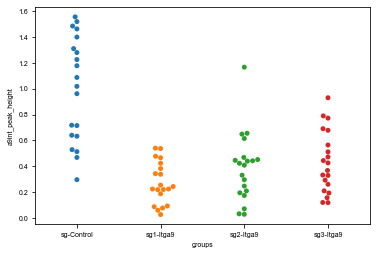

In [5]:
sns.swarmplot(df.groups, df.a9int_peak_height)

## Plots for figures

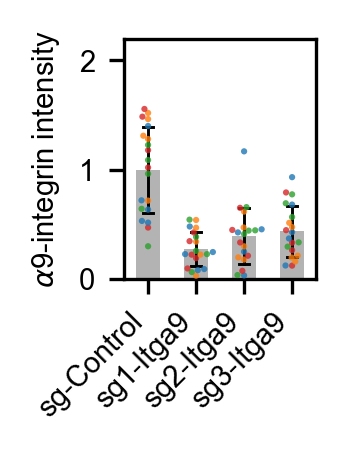

In [6]:
# Swarm plot of 4 categories

outputPrefix = '20210104-Cas9Tg-LV-188-317-318-319-a9-integrin-swarm'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width=0.8
fig_height=1.0
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax = sns.swarmplot(x='groups', y='a9int_peak_height', data=df,
                   hue='gland_id',
#                    palette={'1': 'red', '2': 'green', '3': 'blue', '4': yellow', '5': 'purple'},
#                    color="blue",
                   size=1.5,
                   alpha=.8)

ax = sns.barplot(x='groups', y='a9int_peak_height', data=df,
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor="k", capsize=.2, ci='sd')

plt.ylim(0, 2.2)
# plt.yticks([0, 10, 20])

plt.xlabel(None)
plt.ylabel(r"$\alpha$9-integrin intensity")

# make the bar width narrower
change_bar_width(ax, .5)

# rotate x tick labels
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

# Remove legend (symbols representing orgnoids)
ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


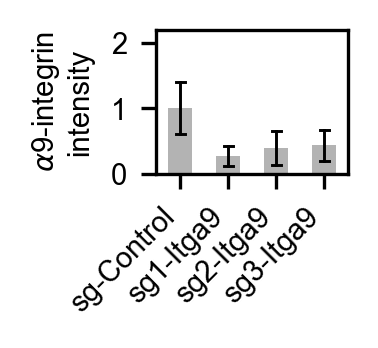

In [7]:
# Bar plot of 4 categories

outputPrefix = '20210104-Cas9Tg-LV-188-317-318-319-a9-integrin-bar'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width=0.8
fig_height=0.6
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax = sns.barplot(x='groups', y='a9int_peak_height', data=df,
                 color=".7", alpha=1.0,
                 errwidth=.7, errcolor="k", capsize=.2, ci='sd')

plt.ylim(0, 2.2)
plt.yticks([0, 1, 2])

plt.xlabel(None)
plt.ylabel(r"$\alpha$9-integrin"+"\nintensity")

# make the bar width narrower
change_bar_width(ax, .5)

# rotate x tick labels
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


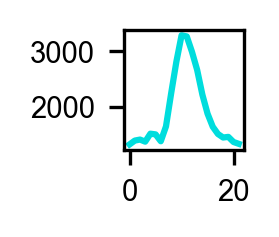

In [8]:
# Example linescan profile

df_example = pd.read_csv('../data/210104-IF-a9-integrin-LV-188-317-318-319-20x/20210104-Cas9Tg-LV-188-317-318-319-IF-output/20210104-Cas9Tg-LV-188-317-318-319-IF-temp-line-scan-output/raw-linescan-profile-record/20210104-SMG-bud-IF-ITGA9-20x-LV-188-003-z-7-1-a9int.txt') 

df_example['pixels'] = list(range(len(df_example)))

outputPrefix = '20210104-a9-integrin-line-scan-example'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width=0.5
fig_height=0.5
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

plt.plot(df_example.pixels, df_example.a9int_intensity, color='#00dddd')

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)


In [9]:
# get descriptive stats for all groups
df.groupby('groups').describe()['a9int_peak_height']

,count,mean,std,min,25%,50%,75%,max
groups,,,,,,,,
sg-Control,20.0,1.000000,0.404723,0.297096,0.638658,1.053009,1.332515,1.555620
sg1-Itga9,20.0,0.271905,0.161271,0.027346,0.164306,0.234566,0.393220,0.540754
sg2-Itga9,20.0,0.388173,0.263585,0.029453,0.206416,0.416560,0.456647,1.167081
sg3-Itga9,20.0,0.433627,0.240098,0.119419,0.248620,0.397484,0.593481,0.930480
